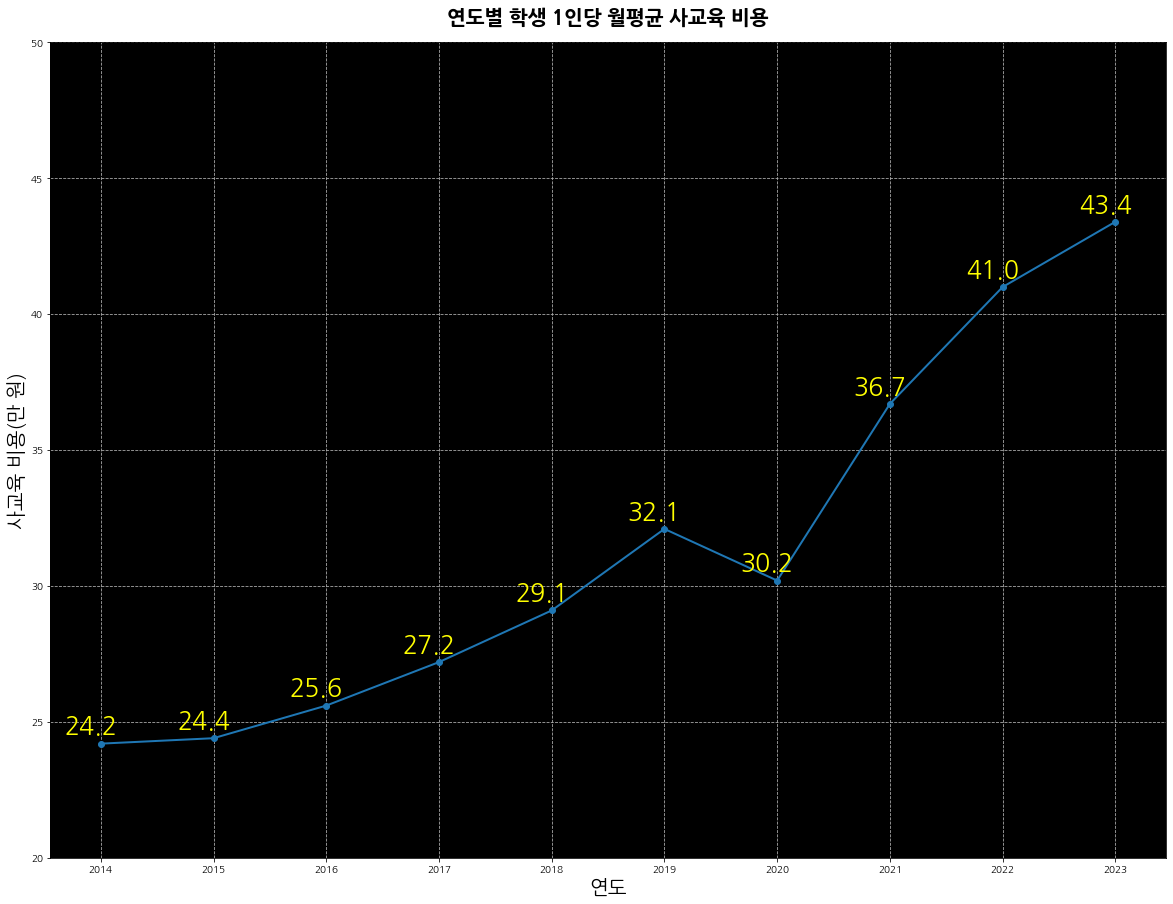

,연도,전체,교육단계,,,가구소득,,,,,,,,,,,
0,2014,24.200001,23.2,27.0,23.0,6.6,9.4,10.2,13.0,15.9,21.2,27.2,31.9,36.7,42.8,-,-
1,2015,24.400000,23.1,27.5,23.6,6.6,9.3,10.2,12.9,15.9,21.2,26.6,31.1,36.1,42.0,-,-
2,2016,25.600000,24.1,27.5,26.2,5.0,8.8,9.8,12.7,15.4,21.1,26.5,31.0,36.5,44.3,-,-
3,2017,27.200001,25.3,29.1,28.5,-,9.3,-,13.0,15.3,21.2,27.4,32.2,36.5,-,40.7,48.3
4,2018,29.100000,26.3,31.2,32.1,-,9.9,-,13.5,15.6,22.2,27.9,32.9,37.3,-,42.2,50.5
5,2019,32.099998,29.0,33.8,36.5,-,10.4,-,14.6,17.0,23.4,30.0,35.4,40.4,-,46.4,53.9
6,2020,30.200001,23.5,34.2,39.6,-,10.3,-,13.8,15.8,20.4,26.9,32.5,37.2,-,44.1,52.6
7,2021,36.700001,32.8,39.2,41.9,-,11.6,-,15.8,18.0,25.3,33.2,38.1,44.4,-,48.6,59.3
8,2022,41.000000,37.2,43.8,46.0,-,12.4,-,17.8,20.5,27.2,35.1,39.9,46.9,-,51.8,64.8
9,2023,43.400002,39.8,44.9,49.1,-,13.6,-,18.3,20.6,27.9,35.3,41.2,48.4,-,52.7,67.1


In [1]:
## 사교육비 증가 추이 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import warnings
import math

# Warning 메세지 무시
warnings.filterwarnings('ignore')

# 데이터 부르기
df2=pd.read_excel('학생 1인당 사교육비.xlsx')

# Cleansing & Fixing
df3=df2.T
df4=df3.set_index([1])
df5=df4.drop([18,19,20,21,22], axis=1).fillna('')
df5.reset_index()
df5.drop([0],axis=1).reset_index()
df6=df5.rename(columns=df5.iloc[0])
df7=df6.reset_index().drop([0],axis=0).drop(['단위:'],axis=1).set_index([1])
df7.index.values[0]=''
df8=df7.reset_index()

df8=df8.rename(columns={1:'연도'}).set_index(keys='연도').reset_index()
df8
df8=df8.drop(0,axis=0)
df8=df8.astype({'전체':'float32'}).reset_index().drop(['index'],axis=1)
df8=df8.drop(labels=range(0,7),axis=0).reset_index().drop(['index'],axis=1)
df8

# 한글 폰트
font_path='NanumGothic.ttf' 
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name) 

# 시각화
plt.figure(figsize=(20,15))
plt.title("연도별 학생 1인당 월평균 사교육 비용",fontsize=20,fontweight='bold',pad=20)
plt.xlabel('연도',fontsize=20)
plt.ylabel('사교육 비용(만 원)',fontsize=20)
plt.plot(df8['연도'],df8['전체'],marker='o',linewidth=2)
plt.yticks([20,25,30,35,40,45,50])
ax = plt.gca()
ax.set_facecolor('black')
plt.grid(linestyle = '--')

# 주석 달기
for year, cost in df8.iloc[:,[0,1]].values:
    plt.annotate(round(cost,2),(year,cost),xytext=(-10,10),textcoords='offset points',fontsize=25,ha='center',color='yellow')

# plt.savefig('연도별 사교육 비용.png')
plt.savefig('연도별 사교육 비용.jpg')
plt.show()

df8